# Выбор локации для скважины

Для нефтянной компании нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Открытие данных

Данные геологоразведки 1-го региона

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
df_0.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 9.0 MB


In [4]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


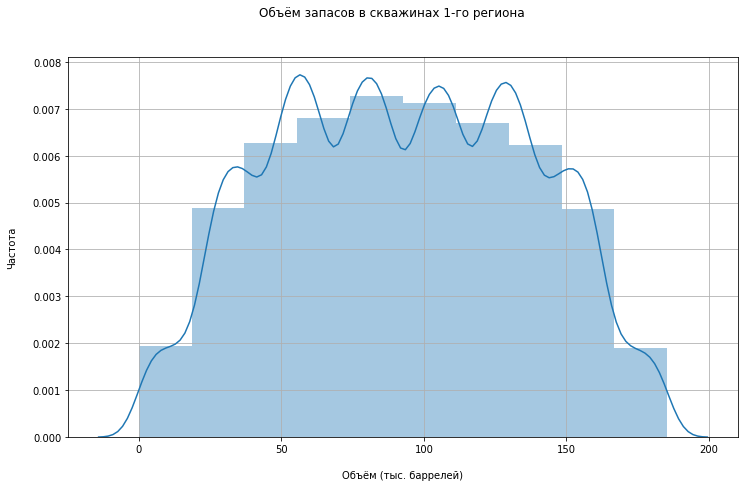

In [5]:
plt.figure(figsize=(12,7))
sns.distplot(df_0['product'], bins = 10)
plt.grid()
plt.suptitle('Объём запасов в скважинах 1-го региона'+ "\n")
plt.ylabel('Частота'+"\n")
plt.xlabel("\n"+'Объём (тыс. баррелей)')
plt.show()

Данные геологоразведки 2-го региона

In [6]:
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
df_1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 9.0 MB


In [8]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


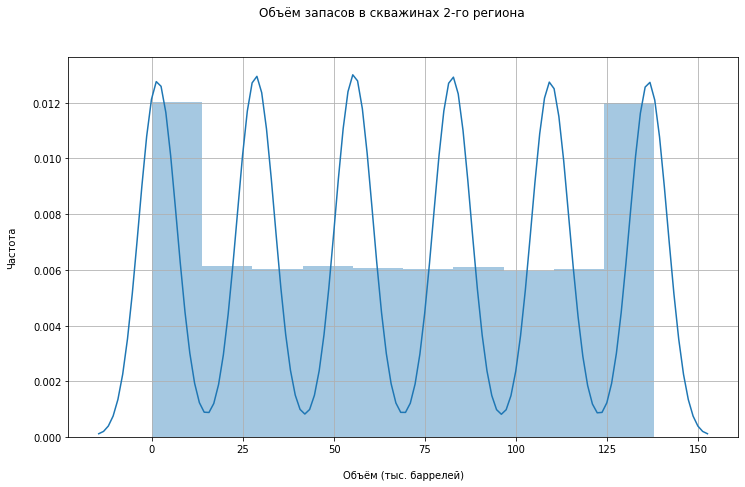

In [9]:
plt.figure(figsize=(12,7))
sns.distplot(df_1['product'], bins = 10)
plt.grid()
plt.suptitle('Объём запасов в скважинах 2-го региона'+ "\n")
plt.ylabel('Частота'+"\n")
plt.xlabel("\n"+'Объём (тыс. баррелей)')
plt.show()

В значениях объема запасов сырья второго региона обнаржены всплески нулевых значений (8235 нулей, что составляет 8% от общего числа скважен) и вспелск значений объема 137.95, общее число которых равно 8233. Удаление этих всплесков не влияет на разельтаты модели. Можно утверждать, что распределение второй таблицы равномерное или прямоугольное.

Данные геологоразведки 3-го региона

In [10]:
df_2 = pd.read_csv('/datasets/geo_data_2.csv')
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
df_2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 9.0 MB


In [12]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


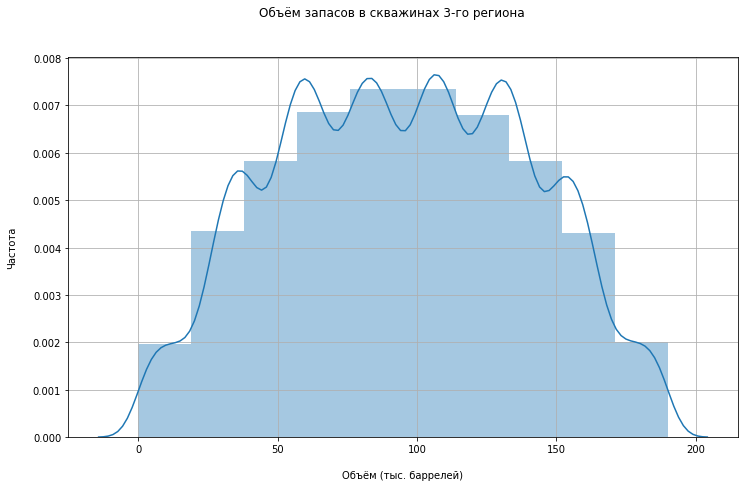

In [13]:
plt.figure(figsize=(12,7))
sns.distplot(df_2['product'], bins = 10)
plt.grid()
plt.suptitle('Объём запасов в скважинах 3-го региона'+ "\n")
plt.ylabel('Частота'+"\n")
plt.xlabel("\n"+'Объём (тыс. баррелей)')
plt.show()

Во всех трех таблицах удалим столбец id, т.к. не будет использоваться в дальнейших моделях 

In [14]:
#Удаления столбца id во всех таблицах
df_0.drop('id', axis=1, inplace=True)
df_1.drop('id', axis=1, inplace=True)
df_2.drop('id', axis=1, inplace=True)

Оптимизируем размеры данных типа float во всех таблицах

In [15]:
converted_float = df_0.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_0[converted_float.columns] = converted_float
df_0.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 4 entries, f0 to product
dtypes: float32(4)
memory usage: 1.5 MB


In [25]:
df_0.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 4 entries, f0 to product
dtypes: float32(4)
memory usage: 1.5 MB


In [16]:
converted_float = df_1.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_1[converted_float.columns] = converted_float
df_1.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 4 entries, f0 to product
dtypes: float32(4)
memory usage: 1.5 MB


In [17]:
converted_float = df_2.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_2[converted_float.columns] = converted_float
df_2.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 4 entries, f0 to product
dtypes: float32(4)
memory usage: 1.5 MB


### Вывод

В ходе выполнения первого пункта были загружены и подготовлен данные, в частности, удалены во всех таблицах столбец id, оптимизированы типы данных. Критических ошибок в таблицах не выявлено, и лишь во второй таблице наблюдаются выбросы значений на нуле и на максимуме, а также распределение второй таблицы является равномерным, в отличие от 1-ой и 3-ей таблицы, где распределение нормальное.

## Обучение и проверка модели

### Разделение выборки

In [18]:
features_df_0 = df_0.drop(['product'], axis=1)
target_df_0 = df_0['product']
features_train_df_0, features_valid_df_0, target_train_df_0, target_valid_df_0 = train_test_split(features_df_0, target_df_0,
                                                                              test_size=0.25, random_state=12345)
features_df_1 = df_1.drop(['product'], axis=1)
target_df_1 = df_1['product']
features_train_df_1, features_valid_df_1, target_train_df_1, target_valid_df_1 = train_test_split(features_df_1, target_df_1,
                                                                              test_size=0.25, random_state=12345)

features_df_2 = df_2.drop(['product'], axis=1)
target_df_2 = df_2['product']
features_train_df_2, features_valid_df_2, target_train_df_2, target_valid_df_2 = train_test_split(features_df_2, target_df_2,
                                                                              test_size=0.25, random_state=12345)

print('Размеры валидационной и тренеровачной выборок 1-ой таблицы:')
print('Размеры признаковых выборок', features_train_df_0.shape, features_valid_df_0.shape)
print('Размеры выборок целефого признака', target_train_df_0.shape, target_valid_df_0.shape)
print("\n"+'Размеры валидационной и тренеровачной выборок 2-ой таблицы:')
print('Размеры признаковых выборок', features_train_df_1.shape, features_valid_df_1.shape)
print('Размеры выборок целефого признака', target_train_df_1.shape, target_valid_df_1.shape)
print("\n"+'Размеры валидационной и тренеровачной выборок 3-ей таблицы:')
print('Размеры признаковых выборок', features_train_df_2.shape, features_valid_df_2.shape)
print('Размеры выборок целефого признака', target_train_df_2.shape, target_valid_df_2.shape)

Размеры валидационной и тренеровачной выборок 1-ой таблицы:
Размеры признаковых выборок (75000, 3) (25000, 3)
Размеры выборок целефого признака (75000,) (25000,)

Размеры валидационной и тренеровачной выборок 2-ой таблицы:
Размеры признаковых выборок (75000, 3) (25000, 3)
Размеры выборок целефого признака (75000,) (25000,)

Размеры валидационной и тренеровачной выборок 3-ей таблицы:
Размеры признаковых выборок (75000, 3) (25000, 3)
Размеры выборок целефого признака (75000,) (25000,)


### Обучение модели

In [19]:
def regress(features_train, target_train, features_valid, target_valid):
    model = LinearRegression().fit(features_train, target_train)
    predicted_valid_linar = model.predict(features_valid)
    predicted_mean = predicted_valid_linar.mean()
    result = mean_squared_error(target_valid, predicted_valid_linar)**0.5
    return predicted_mean, result, predicted_valid_linar
r0 = regress(features_train_df_0, target_train_df_0, features_valid_df_0, target_valid_df_0)
r1 = regress(features_train_df_1, target_train_df_1, features_valid_df_1, target_valid_df_1)
r2 = regress(features_train_df_2, target_train_df_2, features_valid_df_2, target_valid_df_2)
print('1-й регион')
print('Cредний запас предсказанного сырья: ', r0[0])
print('RMSE:', r0[1])
print("\n"+'2-й регион')
print('Cредний запас предсказанного сырья: ', r1[0])
print('RMSE:', r1[1])
print("\n"+'3-й регион')
print('Cредний запас предсказанного сырья: ', r2[0])
print('RMSE:', r2[1])

1-й регион
Cредний запас предсказанного сырья:  92.59258
RMSE: 37.57941948134228

2-й регион
Cредний запас предсказанного сырья:  68.728546
RMSE: 0.8930994427109546

3-й регион
Cредний запас предсказанного сырья:  94.96505
RMSE: 40.0297085110117


По результатам модели 1-го региона видно, что средний запас предсказанного сырья примерно равен среднему запаса сырья по фактическим данным. Значение корня среднеквадратичного ошибки высокое, что говорит о разбросе между фактическими и предсказанными значениями, причем в предсказанных данных встречаются и отрицательные значения. Причиной такого разброса могут быть точки с ошибочными и маловероятными значениями объема нефти, например со значениями близкими к нулю.

По результатам модели 2-го региона видно, что средний запас предсказанного сырья примерно равен среднему запасу сырья по фактическим данным. Значение корня среднеквадратичного ошибки довольно низкое, следовательно, разброс между фактическими и предсказанными значениями минимальный.

По результатам модели 3-го региона видно, что средний запас предсказанного сырья примерно равен среднему запаса сырья по фактическим данным. Значение корня среднеквадратичного ошибки высокое, что говорит о разбросе между фактическими и предсказанными значениями.

### Вывод

Построив модели предсказания объемов скважин в трех регионах, сделаны следующие заключения:
* Во всех регионах средний запас предсказанного сырья примерно равен среднему запасу сырья фактических данных;
* В 1-ом и 3-ем регионах значение RMSE высокое, что говорит о разбросе между фактическими и предсказанными значениями;
* Во 2-ом регионе значение RMSE низкое, следовательно, разброс между фактическими и предсказанными значениями минимальный.

## Подготовка к расчёту прибыли

Условия задачи:
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* бюджет на разработку скважин в регионе — 10 млрд рублей.
* один баррель сырья приносит 450 рублей дохода
* доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [20]:
#количество исследуемых скважин в регионе
RESEARCH_POINTS = 500
 
#количество точек скважин для разработки
DEVELOPMENT_POINTS = 200
 
#бюджет на разработку точек скважин в тыс. руб.
BUDGET = 10**10
 
#доход с одной тысячи барелей нефти в тыс. руб.
REVENUE = 450*10**3

#бююджет на одну скважину в тыс. руб.
BUDGET_POINT = BUDGET / RESEARCH_POINTS
 
#найдем минимальное среднее значение добычи сырья для одной скважины
#c целью безубыточной разработки новой скважины и учетом бюджета, выделенного на регион
 
PRODUCT_MIN_MEAN = (BUDGET + BUDGET_POINT) / (DEVELOPMENT_POINTS * REVENUE)

#Cреднее значение добычи сырья для одной скважины во всех регионах
product_df_0 = df_0['product'].sort_values(ascending=False).iloc[:500]
product_df_1 = df_1['product'].sort_values(ascending=False).iloc[:500]
product_df_2 = df_2['product'].sort_values(ascending=False).iloc[:500]

print('Минимальное среднее значение добычи сырья для одной скважины: ', PRODUCT_MIN_MEAN)
print('Cреднее значение добычи сырья для одной скважины 1-го региона: ', product_df_0.mean())
print('Cреднее значение добычи сырья для одной скважины 2-го региона: ', product_df_1.mean())
print('Cреднее значение добычи сырья для одной скважины 3-го региона: ', product_df_2.mean())


Минимальное среднее значение добычи сырья для одной скважины:  111.33333333333333
Cреднее значение добычи сырья для одной скважины 1-го региона:  184.10594
Cреднее значение добычи сырья для одной скважины 2-го региона:  137.94542
Cреднее значение добычи сырья для одной скважины 3-го региона:  188.8553


Выбрав 500 лучших по объёму скважин, выяснилось, что среднее значение добычи сырья одной скважины в трех регионах выше, чем минимальное среднее значение добычи сырья для одной скважины, следовательно, все регионы являются безубыточными.

## Расчёт прибыли и рисков 

### Функция для расчёта прибыли

In [21]:
df_0_valid = pd.Series(target_valid_df_0).reset_index(drop=True)
df_1_valid = pd.Series(target_valid_df_1).reset_index(drop=True)
df_2_valid = pd.Series(target_valid_df_2).reset_index(drop=True)

predicted_df_0 = pd.Series(*r0[2].reshape(1,-1))
predicted_df_1 = pd.Series(*r1[2].reshape(1,-1))
predicted_df_2 = pd.Series(*r2[2].reshape(1,-1))

def profit(predict, df, count):
    predict_sorted = predict.sort_values(ascending=False)[:count]
    selected = df[predict_sorted.index]
    profit = REVENUE * selected.sum() - BUDGET
    return profit

p0 = profit(predicted_df_0, df_0_valid, DEVELOPMENT_POINTS)
p1 = profit(predicted_df_1, df_1_valid, DEVELOPMENT_POINTS)
p2 = profit(predicted_df_2, df_2_valid, DEVELOPMENT_POINTS)
print('Фактисеская прибыль 1-го региона', p0)
print('Фактисеская прибыль 2-го региона', p1) 
print('Фактисеская прибыль 3-го региона', p2)

Фактисеская прибыль 1-го региона 3320826171.875
Фактисеская прибыль 2-го региона 2415088671.875
Фактисеская прибыль 3-го региона 2710349316.40625


Наибольшая прибыль в расчитывается 1-ем регионе.

### Расчёт рисков

In [22]:
def bootstrap(predict, df, count):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        pred_subsample = predict.sample(n = RESEARCH_POINTS, replace=True, random_state = state)
        values.append(profit(pred_subsample, df, count))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    return mean, lower, upper, values

b0 = bootstrap(predicted_df_0, df_0_valid, DEVELOPMENT_POINTS)
b1 = bootstrap(predicted_df_1, df_1_valid, DEVELOPMENT_POINTS)
b2 = bootstrap(predicted_df_2, df_2_valid, DEVELOPMENT_POINTS)
print("1-й регион")
print("Средняя прибыль: {:.2f}".format(b0[0]))
print("2.5%-квантиль: {:.2f}".format(b0[1]))
print("97.5%-квантиль: {:.2f}".format(b0[2]))
print("\n"+"2-й регион")
print("Средняя прибыль: {:.2f}".format(b1[0]))
print("2.5%-квантиль: {:.2f}".format(b1[1]))
print("97.5%-квантиль: {:.2f}".format(b1[2]))
print("\n"+"3-й регион")
print("Средняя прибыль: {:.2f}".format(b2[0]))
print("2.5%-квантиль: {:.2f}".format(b2[1]))
print("97.5%-квантиль: {:.2f}".format(b2[2]))

1-й регион
Средняя прибыль: 396164978.81
2.5%-квантиль: -111215019.53
97.5%-квантиль: 909767150.88

2-й регион
Средняя прибыль: 456046302.15
2.5%-квантиль: 33820837.40
97.5%-квантиль: 852290263.67

3-й регион
Средняя прибыль: 404403840.72
2.5%-квантиль: -163351166.99
97.5%-квантиль: 950359677.73


Риск убытков

In [23]:
def losses(predict, df, count):
    bootstrap_profit = pd.DataFrame(bootstrap(predict, df, count)[3], columns = ['profit'])
    bootstrap_profit = bootstrap_profit.query('profit < 0')
    losses = bootstrap_profit.shape
    return losses
l0 = losses(predicted_df_0, df_0_valid, DEVELOPMENT_POINTS)[0]/10
l1 = losses(predicted_df_1, df_1_valid, DEVELOPMENT_POINTS)[0]/10
l2 = losses(predicted_df_2, df_2_valid, DEVELOPMENT_POINTS)[0]/10
print('Доля убыточных точек в процентах')
print('1-й регион:',l0)
print('2-й регион:',l1)
print('3-й регион:',l2)

Доля убыточных точек в процентах
1-й регион: 6.9
2-й регион: 1.5
3-й регион: 7.6


Просчитав техникой Bootstrap среднюю прибыль и интервал возможной прибыли для трёх регионов видно, что наибольшая средняя прибыль во втором регионе. Чуть меньше прибыль в 1-ом и 3-ем регионе, но доверительный интервал намного больше относительно второго региона и включает отрицательные значения, следовательно, лучшим регионом для разработки является 2-ой регион.

Расчет доли убыточных скважин показал, больше всего убыточных точек во третьем и первом регионе, а также данные регионы не проходят порог риска убытков в 2.5%. Лычший результат представлен во втором регионе (1.5%). 

### Вывод

В данном пункте были подсчитаны риски и прибыли всех трех регионов.

In [24]:
d = ({'регион':[1,2,3],'фактическая прибыль':[p0, p1, p2],'средняя прибыль':[b0[0],b1[0],b2[0]]
,'нижний доверительный интервал':[b0[1],b1[1], b2[1]], 'верхний доверительный интервал': [b0[2], b1[2], b2[2]]
     ,'Доля убыточных точек в процентах':[l0,l1,l2]})
df = pd.DataFrame(data=d)
df

,регион,фактическая прибыль,средняя прибыль,нижний доверительный интервал,верхний доверительный интервал,Доля убыточных точек в процентах
0,1,3.320826e+09,3.961650e+08,-1.112150e+08,9.097672e+08,6.9
1,2,2.415089e+09,4.560463e+08,3.382084e+07,8.522903e+08,1.5
2,3,2.710349e+09,4.044038e+08,-1.633512e+08,9.503597e+08,7.6


Лучшим для разработки оказался 2-й регион, т.к. в данном регионе высокая фактическая прибыль (~ 2 млрд.руб.), высокая средняя прибыль (456 млн.руб.) при небольшой разности доверительного интервала (от 338 млн.руб. до 852 млн.руб.), а также низкий риск убытков (1.5%).

## Общий вывод

В ходе выполнения проекта о выборе локации для скважины были загружены и подготовлены данные, в частности, выявлены всплески  значений во второй таблице.

Построив модели предсказания объемов скважин в трех регионах, сделаны следующие заключения:
* Во всех регионах средний запас предсказанного сырья примерно равен среднему запасу сырья фактических данных;
* В 1-ом и 3-ем регионах значение RMSE высокое, что говорит о разбросе между фактическими и предсказанными значениями;
* Во 2-ом регионе значение RMSE низкое, следовательно, разброс между фактическими и предсказанными значениями минимальный.

Выбрав 500 лучших по объёму скважин, выяснилось, что среднее значение добычи сырья одной скважины в трех регионах выше, чем минимальное среднее значение добычи сырья для одной скважины, следовательно, все регионы являются безубыточными.

Лучшим для разработки оказался 2-й регион, т.к. в данном регионе высокая фактическая прибыль (~ 2 млрд.руб.), высокая средняя прибыль (456 млн.руб.) при небольшой разности доверительного интервала (от 338 млн.руб. до 852 млн.руб.), а также низкий риск убытков (1.5%).